In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
from keras.preprocessing import image


from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip  \
-O /tmp/rockpaperscissors.zip

--2020-06-29 03:40:08--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.76MB/s    in 49s     

2020-06-29 03:40:59 (6.25 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [ ]:
pip install split-folders

In [ ]:
import split_folders

# source : https://pypi.org/project/split-folders/

In [ ]:
split_folders.ratio(base_dir, output='/tmp/rockpaperscissors/data', seed=1337, ratio=(0.8, 0.2))

Copying files: 2188 files [00:00, 2620.94 files/s]


In [ ]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['README_rpc-cv-images.txt', 'paper', 'rock', 'scissors']

In [ ]:
os.listdir('/tmp/rockpaperscissors/data')

['val', 'train']

In [ ]:
os.listdir('/tmp/rockpaperscissors/data/train/')

['paper', 'rock', 'scissors']

In [ ]:
os.listdir('/tmp/rockpaperscissors/data/val')

['paper', 'rock', 'scissors']

In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
# membuat direktori batu pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')
 
# membuat direktori gunting pada direktori data training
train_scissors_dir = os.path.join(train_dir, 'scissors')

# membuat direktori kertas pada direktori data training
train_paper_dir = os.path.join(train_dir, 'paper')
 
# membuat direktori batu pada direktori data validasi
validation_rock_dir = os.path.join(validation_dir, 'rock')
 
# membuat direktori gunting pada direktori data validasi
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

# membuat direktori kertas pada direktori data validasi
validation_paper_dir = os.path.join(validation_dir, 'paper')

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    validation_split=0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        '/tmp/rockpaperscissors/data/train',  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=40,
        color_mode='rgb',
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        '/tmp/rockpaperscissors/data/val', # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=40,
        color_mode='rgb', 
        class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [ ]:
print(validation_generator.class_indices)
print(train_generator.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}
{'paper': 0, 'rock': 1, 'scissors': 2}


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
# Put new model to see if any sign of improvement is signified
# Define the optimizer
optimizer = tf.keras.optimizers.Adamax(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07
)

In [ ]:
# Compile the model

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])

In [ ]:
# Create a callback instance
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.001, min_delta=0.0001)

In [ ]:
# Create a earlystopping instance
from keras.callbacks import EarlyStopping

earlystopper = EarlyStopping(monitor='val_loss', patience=3)


In [ ]:
# Class myCallback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if((logs.get('loss')<0.08) | (logs.get('val_loss')<0.08)):
      print("\nReached below 5% loss & validation loss so stop the training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=30,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,   # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2, callbacks = [callbacks])
history

Epoch 1/30
25/25 - 60s - loss: 1.1016 - categorical_accuracy: 0.4110 - val_loss: 1.0674 - val_categorical_accuracy: 0.6750
Epoch 2/30
25/25 - 59s - loss: 0.7860 - categorical_accuracy: 0.6572 - val_loss: 0.5899 - val_categorical_accuracy: 0.8100
Epoch 3/30
25/25 - 59s - loss: 0.3515 - categorical_accuracy: 0.8787 - val_loss: 0.3913 - val_categorical_accuracy: 0.8300
Epoch 4/30
25/25 - 60s - loss: 0.2823 - categorical_accuracy: 0.8888 - val_loss: 0.3041 - val_categorical_accuracy: 0.9000
Epoch 5/30
25/25 - 63s - loss: 0.2450 - categorical_accuracy: 0.9130 - val_loss: 0.2733 - val_categorical_accuracy: 0.9150
Epoch 6/30
25/25 - 60s - loss: 0.1870 - categorical_accuracy: 0.9272 - val_loss: 0.3222 - val_categorical_accuracy: 0.9050
Epoch 7/30
25/25 - 60s - loss: 0.1628 - categorical_accuracy: 0.9430 - val_loss: 0.2243 - val_categorical_accuracy: 0.9150
Epoch 8/30
25/25 - 60s - loss: 0.2336 - categorical_accuracy: 0.9200 - val_loss: 0.2824 - val_categorical_accuracy: 0.9050
Epoch 9/30
25/25

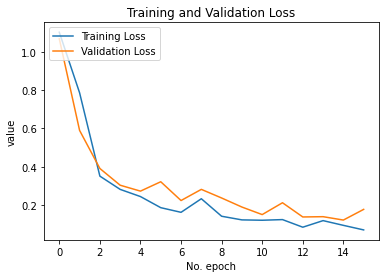

In [ ]:
# Plotting Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

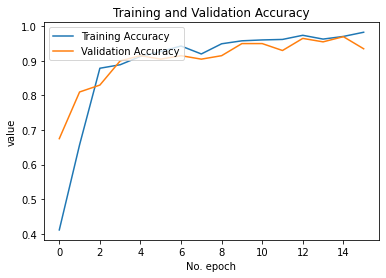

In [ ]:
# Plotting Accuracy
plt.plot(history.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Save the created model as a my_model.
!mkdir -p saved_model
model.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
# Load the saved model 
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 17, 17, 128)      

Saving hand.jpg to hand.jpg


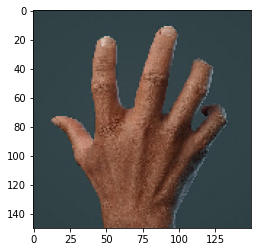

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = new_model.predict(images, batch_size=10)

  

In [ ]:
print("Classes = ", classes[0][0])
print("Classes = ", classes[0][1])
print("Classes = ", classes[0][2])

Classes =  1.0
Classes =  0.0
Classes =  0.0


In [ ]:
print(fn)
if np.all(classes == [[1., 0., 0.]]):
    print('paper')
elif np.all(classes == [[0., 1., 0.]]):
    print('rock')
elif np.all(classes == [[0., 0., 1.]]):
    print('scissors')
else :
    print('not a class')

hand.jpg
paper
